# Estatística descritiva univariada

### Transformação de variáveis quantitativas em qualitativas



Conforme descrito no início deste módulo, as variáveis quantitativas contínuas são aquelas cujos possíveis valores pertencem a um intervalo de números reais. Desta forma, não faz sentido calcular a frequência para cada valor possível, já que eles raramente se repetem. 

Neste contexto, faz sentido agrupar os dados em classes ou faixas. O intervalo a ser definido entre as classes é arbitrário. Porém, se o número de classes for muito pequeno, informações são perdidas; enquanto que, se o número de classes for muito grande, o resumo das informações fica prejudicado. 

O intervalo entre as classes não precisaria ser constante, mas por uma questão de simplicidade e facilidade de interpretação, é costume adotar um intervalo constante.


Para ilustrar, usaremos a seguinte base de dados, com as notas finais de 30 alunos em uma disciplina de estatística de uma universidade.

In [1]:
import pandas as pd

DADOS = "./dados/grades.csv"

df_notas = pd.read_csv(DADOS)

df_notas.head()

,grades
0,4.2
1,3.9
2,5.7
3,6.5
4,4.6


In [2]:
df_notas.tail()

,grades
25,5.0
26,6.6
27,7.1
28,5.3
29,4.7


In [3]:
df_notas.describe()

,grades
count,30.000000
mean,5.686667
std,1.318498
min,3.500000
25%,4.700000
50%,5.500000
75%,6.575000
max,8.800000


In [4]:
# "problema" com valores contínuos
df_notas["grades"].value_counts()

grades
5.0    4
5.5    2
6.0    2
4.7    2
7.2    2
4.2    1
6.8    1
7.1    1
6.6    1
3.8    1
8.8    1
7.4    1
3.5    1
4.5    1
6.4    1
3.9    1
4.4    1
8.0    1
6.3    1
4.6    1
6.5    1
5.7    1
5.3    1
Name: count, dtype: int64

In [5]:
df_notas["grades"].value_counts(bins=10)

(4.56, 5.09]     7
(6.15, 6.68]     4
(6.68, 7.21]     4
(3.494, 4.03]    3
(4.03, 4.56]     3
(5.09, 5.62]     3
(5.62, 6.15]     3
(7.21, 7.74]     1
(7.74, 8.27]     1
(8.27, 8.8]      1
Name: count, dtype: int64

In [6]:
df_notas["grades"].value_counts(bins=10).sort_index()

(3.494, 4.03]    3
(4.03, 4.56]     3
(4.56, 5.09]     7
(5.09, 5.62]     3
(5.62, 6.15]     3
(6.15, 6.68]     4
(6.68, 7.21]     4
(7.21, 7.74]     1
(7.74, 8.27]     1
(8.27, 8.8]      1
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

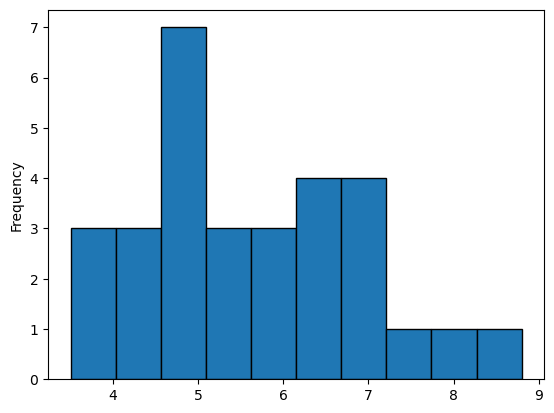

In [8]:
df_notas["grades"].plot.hist(bins=10, edgecolor="black")

In [9]:
df_notas["grades"].value_counts(bins=5).sort_index()

(3.494, 4.56]     6
(4.56, 5.62]     10
(5.62, 6.68]      7
(6.68, 7.74]      5
(7.74, 8.8]       2
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

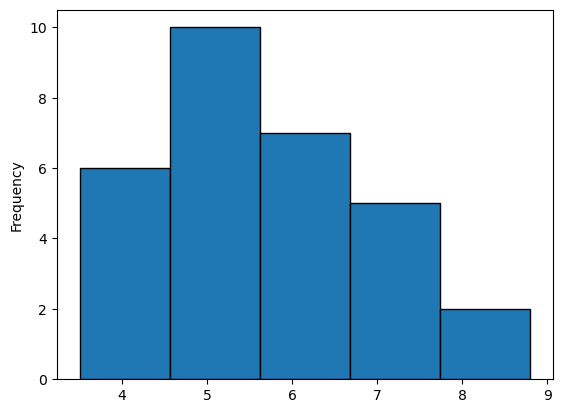

In [10]:
df_notas["grades"].plot.hist(bins=5, edgecolor="black")